# Proyek Analisis Data: [Bike-Sharing-Dataset]
- **Nama:** [Maylina Nur'aini]
- **Email:** [maylinanuraini@gmail.com]
- **ID Dicoding:** [mc444d5x0679]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola tren peminjaman sepeda berdasarkan musim(season)?
- Pertanyaan 2 : Apa faktor yang paling mempengaruhi jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

## Data Wrangling

### Gathering Data

In [ ]:
# Mengupload file dataset
from google.colab import files
uploades = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [ ]:
# Membaca dataset dan menampilkannya
day_df = pd.read_csv(io.BytesIO(uploades['day.csv']))
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Membaca dataset dan menampilkannya
hour_df = pd.read_csv(io.BytesIO(uploades['hour.csv']))
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Melakukan proses import dataset yang akan digunakan.
- Menampilkan data peminjaman sepeda perhari dan peminjaman sepeda perjam dengan format csv

### Assessing Data

In [ ]:
# Melakukan pemeriksaan informasi tipe data dari tiap kolom day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Pemeriksaan informasi tipe data dari tiap kolom hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Melakukan pemeriksaan missing value setiap kolom dalam day_df
print (day_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
# Melakukan pemeriksaan missing value setiap kolom dalam day_df
print (hour_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [ ]:
# Melakukan pemeriksaan statistik dari kolom numerik pada day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Melakukan pemeriksaan statistik dari kolom numerik pada hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada pemeriksaan tipe data dalam day_df dan hour_df ada ketidaksesuaian tipe data pada dteday yaitu object yang seharusnya menggunakan tipe data datetime.
- Dalam pemeriksaan missing value, duplikasi, dan statistik(dari kolom numerik) pada dataset day_df dan hour_df tidak ada kesalahan di kedua datasetnya.

### Cleaning Data

In [ ]:
# Mengganti tipe data pada kolom dteday dalam day_df
datatime_column = ['dteday']

for column in datatime_column:
  day_df[column] = pd.to_datetime(day_df[column])

# Melakukan pengecekan pada dtday dalam day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
# Mengganti tipe data pada kolom dteday dalam hour_df
datatime_column = ['dteday']

for column in datatime_column:
  hour_df[column] = pd.to_datetime(hour_df[column])

# Melakukan pengecekan pada dtday dalam hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
# Menghapus semua baris yang memiliki nilai hilang
day_df.dropna(inplace=True)

# # Mengecek apakah masih ada nilai yang hilang
print(day_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
# Menghapus semua baris yang memiliki nilai hilang
hour_df.dropna(inplace=True)

# # Mengecek apakah masih ada nilai yang hilang
print(hour_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Mengganti tipe data, dataset day_df dan hour_df pada kolom dtday yang sebelumnya berisi object dan menjadi tipe data datetime

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [ ]:
# Merangkum parameter statistik dari data day_df
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
# Persebaran jumlah peminjam sepeda berdasarkan season
day_df.groupby('season').cnt.nunique().sort_values(ascending=False)

,cnt
season,
3,188
2,182
1,179
4,176


In [ ]:
# Tren Jumlah peminjaman berdasarkan musim
day_df.groupby('season').agg({
    'cnt': 'sum',
    'temp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
}).sort_values(by='cnt', ascending=False)

,cnt,temp,hum,windspeed
season,,,,
3,1061129,0.706309,0.633482,0.172095
2,918589,0.544405,0.626948,0.203507
4,841613,0.422906,0.668719,0.171995
1,471348,0.297748,0.582903,0.214537


In [ ]:
# Memilih kolom numerik
numeric_data = day_df.select_dtypes(include='number')

# Menghitung matriks korelasi
correlation = numeric_data.corr()

# Mencetak hasil matriks korelasi
print(correlation)

             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
casual      0.275255  0.210399  0.2485

### Explore Data hour_df

In [ ]:
# Melihat parameter statistik dari data hour_df
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
# Tren jumlah peminjaman berdasarkan jam
hour_counts = hour_df['hr'].value_counts().sort_index()

# Mengelompokkan data berdasarkan jam dan menghitung total peminjaman
hour_counts = hour_df.groupby('hr').agg({'cnt': 'sum'}).reset_index()

print(hour_counts)

    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


In [ ]:
# Mengelompokkan data berdasarkan jam dan cuaca, dan menghitung statistik
stats = hour_df.groupby(['hr', 'weathersit']).agg({
    'cnt': ['mean', 'std', 'min', 'max']  # Menghitung statistik yang relevan
}).reset_index()

print(stats)

    hr weathersit         cnt                    
                         mean        std min  max
0    0          1   59.161554  43.437921   5  249
1    0          2   47.232432  39.414672   3  283
2    0          3   28.115385  26.105107   2  117
3    1          1   34.395918  33.554863   1  165
4    1          2   35.541899  35.512178   1  168
..  ..        ...         ...        ...  ..  ...
70  22          2  116.823171  61.222709  10  326
71  22          3   70.345455  54.017562  11  215
72  23          1   93.981707  51.132487   6  256
73  23          2   85.171598  48.435157   9  220
74  23          3   49.373134  35.426337   2  163

[75 rows x 6 columns]


In [ ]:
# Memilih kolom numerik
numeric_data = hour_df.select_dtypes(include='number')

# Menghitung matriks korelasi
correlation = numeric_data.corr()

# Mencetak hasil matriks korelasi
print(correlation)

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

**Insight:**
- Dengan melakukan eksplor ini dapat menjadi bahan pertimbangan saat akan membuat visualization dan explanatory analysis begitu pun dapat membantu menjawab pertanyaan bisnis.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola tren peminjaman sepeda berdasarkan musim(season)?

In [ ]:
# Mengelompokkan data berdasarkan musim dan menghitung total peminjaman
seasonal_rentals_df = day_df.groupby('season').agg({
    "instant": "nunique",  # Menghitung jumlah hari unik dalam setiap musim
    "cnt": "sum"  # Menghitung total peminjaman sepeda dalam setiap musim
})

# Mengubah nama kolom agar lebih deskriptif
seasonal_rentals_df.rename(columns={
    "instant": "days_in_season",  # Mengganti 'instant' dengan 'days_in_season'
    "cnt": "total_rentals"  # Mengganti 'cnt' dengan 'total_rentals'
}, inplace=True)

# Mereset indeks agar menjadi kolom
seasonal_rentals_df = seasonal_rentals_df.reset_index()

# Menampilkan DataFrame hasil
print(seasonal_rentals_df)

   season  days_in_season  total_rentals
0       1             181         471348
1       2             184         918589
2       3             188        1061129
3       4             178         841613


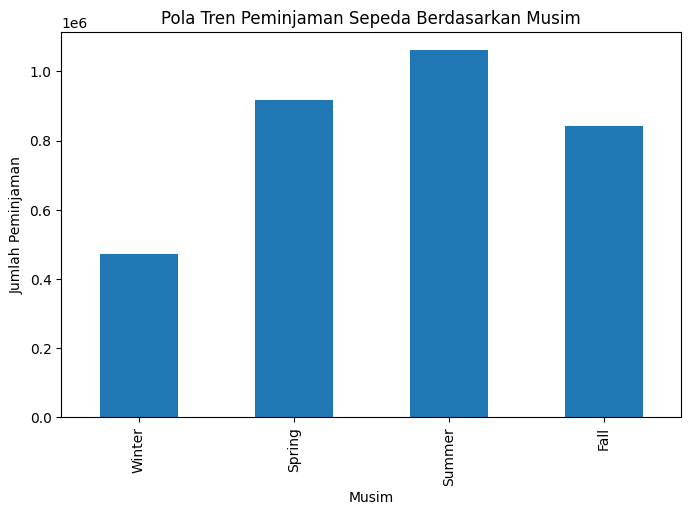

In [ ]:
# Visualisasi pola tren peminjaman sepeda berdasarkan musim
plt.figure(figsize=(8, 5)) #Fixed: Removed unexpected indentation
# Mengganti 'count' dengan 'cnt' untuk mengakses kolom yang benar
season_counts = day_df.groupby('season')['cnt'].sum()
season_counts.plot(kind='bar')
plt.title('Pola Tren Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

### Pertanyaan 2: Apa faktor yang paling mempengaruhi jumlah peminjaman sepeda?

In [ ]:
# Memilih kolom numerik
numeric_data = day_df.select_dtypes(include='number')

# Menghitung matriks korelasi
correlation = numeric_data.corr()

# Menampilkan korelasi dengan 'cnt'
print("Korelasi dengan jumlah peminjaman (cnt):")
print(correlation['cnt'].sort_values(ascending=False))

Korelasi dengan jumlah peminjaman (cnt):
cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


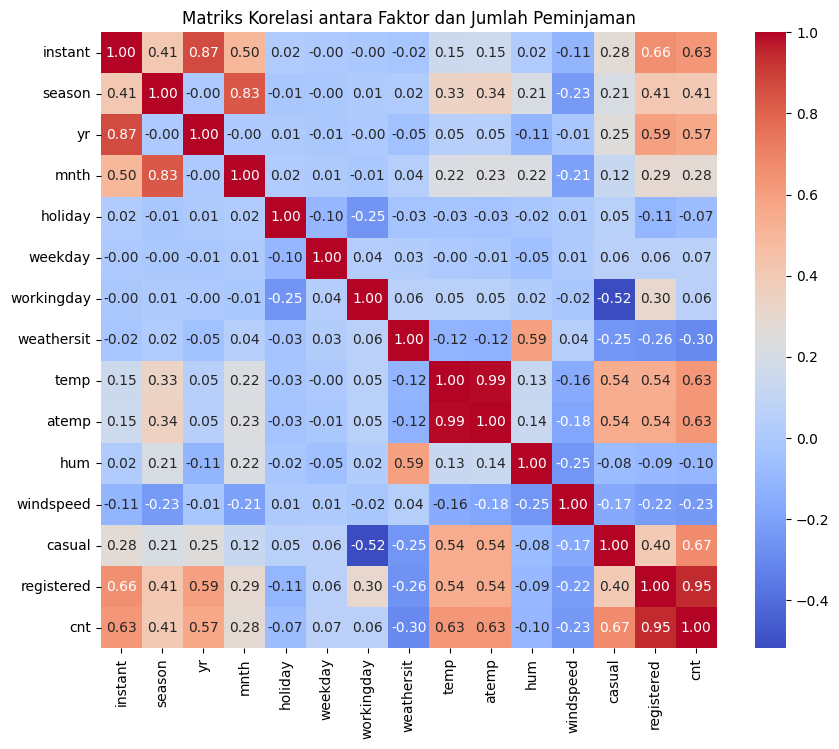

In [ ]:
# Visualisasi heatmap untuk korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriks Korelasi antara Faktor dan Jumlah Peminjaman')
plt.show()

**Insight:**
- Pada pertanyaan pertama, peningkatan jumlah peminjam terjadi pada musim semi, mencapai puncaknya di musim panas dan gugur, kemudian menurun drastis pada musim dingin. Faktor utamaa yang mempengaruhi pola tren ini merupakan musim dengan cuaca hangat dan nyaman (spring, summer, fall) cenderung memiliki jumlah peminjaman yang lebih tinggi dibandingkan musim dingin yang dingin dan kurang nyaman.
- Pada pertanyaan kedua, terdapat beberapa faktor yang mempengaruhi jumlah peminjaman sepeda. Suhu (temp) dan suhu yang dirasakan (atemp) adalah faktor paling berpengaruh terhadap jumlah peminjaman sepeda. Semakin tinggi suhu, semakin banyak orang yang meminjam sepeda.
Musim (season) dan tahun (yr) juga memiliki pengaruh yang signifikan. Musim panas dan gugur cenderung memiliki peminjaman yang lebih tinggi, dan ada tren peningkatan peminjaman dari tahun ke tahun.
Kelembapan (hum) dan kecepatan angin (windspeed) memiliki pengaruh yang relatif kecil dibandingkan faktor-faktor lainnya.

## Analisis Lanjutan (Opsional)

In [ ]:
# Konversi kolom 'dteday' ke datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Tentukan tanggal terakhir dalam dataset
latest_date = hour_df['dteday'].max() + dt.timedelta(days=1)

# Hitung Recency, Frequency, dan Monetary
rfm_df = hour_df.groupby(['casual', 'registered']).agg({
    'dteday': lambda x: (latest_date - x.max()).days,  # Recency
    'instant': 'nunique',  # Frequency (jumlah peminjaman unik)
    'cnt': 'sum'  # Monetary (total jumlah peminjaman)
})

# Ubah nama kolom
rfm_df.rename(columns={
    'dteday': 'Recency',
    'instant': 'Frequency',
    'cnt': 'Monetary'
}, inplace=True)

# Reset index
rfm_df = rfm_df.reset_index()

print(rfm_df.head())

   casual  registered  Recency  Frequency  Monetary
0       0           1        1        141       141
1       0           2        2        164       328
2       0           3        1        164       492
3       0           4        4        141       564
4       0           5        4        137       685


In [ ]:
# Tentukan quantile untuk setiap skor RFM
quantiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75])

# Fungsi untuk memberikan skor RFM (1-4)
def rfm_score(x, q, variable):
    if x <= q[variable][0.25]:
        return 4
    elif x <= q[variable][0.50]:
        return 3
    elif x <= q[variable][0.75]:
        return 2
    else:
        return 1

# Berikan skor RFM untuk setiap pengguna
rfm_df['R_Score'] = rfm_df['Recency'].apply(rfm_score, args=(quantiles, 'Recency'))
rfm_df['F_Score'] = rfm_df['Frequency'].apply(rfm_score, args=(quantiles, 'Frequency'))
rfm_df['M_Score'] = rfm_df['Monetary'].apply(rfm_score, args=(quantiles, 'Monetary'))

# Gabungkan skor RFM menjadi satu kolom
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

print(rfm_df.head())

   casual  registered  Recency  Frequency  Monetary  R_Score  F_Score  \
0       0           1        1        141       141        4        1   
1       0           2        2        164       328        4        1   
2       0           3        1        164       492        4        1   
3       0           4        4        141       564        4        1   
4       0           5        4        137       685        4        1   

   M_Score RFM_Score  
0        4       414  
1        2       412  
2        1       411  
3        1       411  
4        1       411  


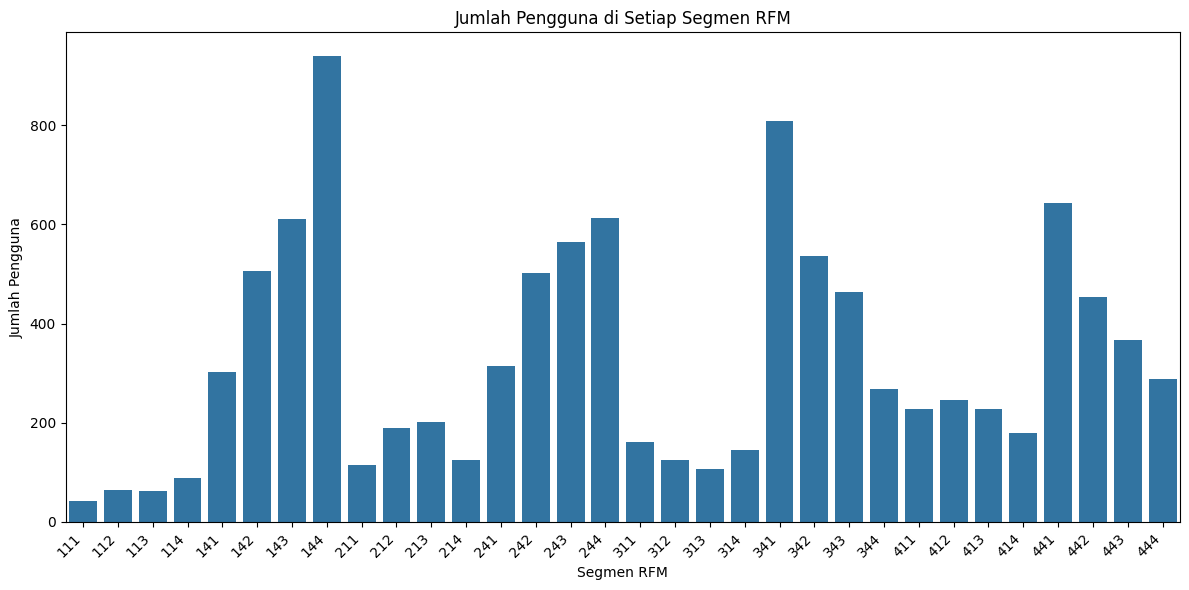

In [ ]:
# Menghitung jumlah pengguna di setiap segmen RFM
segment_counts = rfm_df['RFM_Score'].value_counts().sort_index()

# Membuat diagram batang
plt.figure(figsize=(12, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Jumlah Pengguna di Setiap Segmen RFM')
plt.xlabel('Segmen RFM')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()
plt.show()

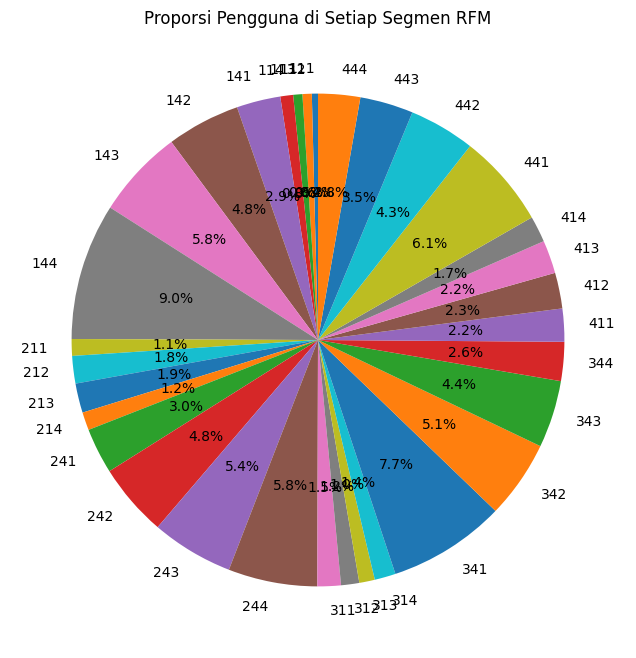

In [ ]:
# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Pengguna di Setiap Segmen RFM')
plt.show()

**Insight:**
- Pada diagram batang menunjukkan jumlah pengguna di setiap segmen RFM.
- pada diagram pie menunjukkan proporsi pengguna di setiap segmen RFM.
- Analisis RFM dapat membantu memahami perilaku pengguna dan mengelompokkannya ke dalam segmen-segmen yang berbeda. Informasi ini saya gunakan untuk digunakan untuk membuat strategi pemasaran yang lebih efektif seperti Mendorong retensi pengguna di segmen "444" dengan memberikan reward atau loyalty program, meningkatkan aktivasi pengguna di segmen "111" dengan memberikan promosi atau penawaran khusus, mendorong pengguna di segmen lain untuk naik ke segmen yang lebih tinggi dengan memberikan insentif atau edukasi.

## Conclusion

- Conclution pertanyaan : 1 Bagaimana pola tren peminjaman sepeda berdasarkan musim (season)?
Terdapat pola tren peminjaman sepeda yang jelas berdasarkan musim. Jumlah peminjaman meningkat pada musim semi, mencapai puncaknya di musim panas dan gugur, kemudian menurun drastis pada musim dingin. Dan faktor utama yang mempengaruhi pola tren ini adalah cuaca. Musim dengan cuaca hangat dan nyaman (spring, summer, fall) cenderung memiliki jumlah peminjaman yang lebih tinggi dibandingkan musim dingin yang dingin dan kurang nyaman.
- Conclution pertanyaan 2 : Apa faktor yang paling mempengaruhi jumlah peminjaman sepeda? Faktor yang paling mempengaruhi jumlah peminjaman sepeda adalah suhu (temp) dan suhu yang dirasakan (atemp). Semakin tinggi suhu, semakin banyak orang yang meminjam sepeda. Ada jugaa faktor lain yang juga berpengaruh signifikan adalah musim (season) dan tahun (yr). Musim panas dan gugur cenderung memiliki peminjaman yang lebih tinggi, dan ada tren peningkatan peminjaman dari tahun ke tahun. Dan Kelembapan (hum) dan kecepatan angin (windspeed) memiliki pengaruh yang relatif kecil dibandingkan faktor-faktor lainnya.

## Unduh Berkas data

In [ ]:
# Memastikan 'dteday' dalam format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Gabungkan dataset berdasarkan tanggal (dteday) dengan how='outer'
all_df = pd.merge(hour_df, day_df, on='dteday', how='outer', suffixes=('_hourly','_daily'))

# Menampilkan informasi data yang tidak cocok
print("Jumlah baris di day_df:", len(day_df))
print("Jumlah baris di hour_df:", len(hour_df))
print("Jumlah baris di all_df:", len(all_df))
print("Jumlah data yang tidak cocok:", len(all_df) - len(hour_df))

# Mengisi nilai NaN dengan 0 (opsional)
all_df.fillna(0, inplace=True)

Jumlah baris di day_df: 731
Jumlah baris di hour_df: 17379
Jumlah baris di all_df: 17379
Jumlah data yang tidak cocok: 0


In [ ]:
#simpan file
all_df.to_csv('all_data.csv', index=False)